In [2]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECUSRSOS HUMANOS

In [156]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Abrir el archivo

In [19]:
total=pd.read_excel("TOTALULIMPIO1.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
EMPRESA,,,,,,,,,,,,,,,,,,,,,
145973,145898,11,1810,2008,0,2,0,2,0,10,...,641984,3525900,3525900,0,0,912761,2602400,0,0,3460300
145979,145904,11,1810,2008,2,7,0,0,0,3,...,201817,296411,296411,9406,0,122106,102941,0,0,296411
145987,145912,11,1810,2008,0,0,0,1,0,30,...,143460,1594496,1594496,3200,46,366562,867491,0,194621,1597520
145988,145913,11,1741,2008,1,0,0,2,0,3,...,8704,166200,166200,-2000,0,92868,26720,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987525,987525,8,139,2016,0,0,4,7,0,53,...,6085413,11257778,11907721,25885,84,3431145,4925968,0,654653,11002090
987529,987529,8,139,2016,0,18,1,1,0,24,...,501051,1554335,1566400,0,0,794639,279709,244803,0,1657388
987530,987530,8,139,2016,0,65,3,31,0,512,...,21681651,86282095,85785462,262072,2,22787632,46732723,2530882,49583775,85991402
987533,987533,8,139,2016,0,10,2,6,0,49,...,1603874,7892838,7892838,0,36,3682753,4038309,0,0,8600884


Separar las variables dependientes de las independientes (RECURSOS HUMANOS) y normalizarlas

In [21]:
variables = ['SOCIOS','PERMANENTE','APRENDIZ','PROD_NAL','PROD_EXT','OBRERO','ADM','TOTPERSONAL','TEMPORALDIRECTO','PERMANENTE','VENTAS']
X=total.loc[:,variables].values # Separando los Recursos humanos
y=total.loc [:, ['VENTAS']].values # Separando el objetivo que es ventas


In [24]:
x_std= StandardScaler().fit_transform(X)

C:\Users\CASA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CASA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
recursosh = pd.DataFrame(data = X, columns = variables).head(11646)
recursosh

,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,ADM,TOTPERSONAL,TEMPORALDIRECTO,PERMANENTE,VENTAS
0,0,2,0,2,0,10,1,13,0,2,3460300
1,2,7,0,0,0,3,6,9,0,7,296411
2,0,0,0,1,0,30,5,36,46,0,1597520
3,1,0,0,2,0,3,0,5,0,0,231480
...,...,...,...,...,...,...,...,...,...,...,...
11641,0,0,4,7,0,53,25,85,84,0,11002090
11642,0,18,1,1,0,24,5,30,0,18,1657388
11643,0,65,3,31,0,512,90,633,2,65,85991402
11644,0,10,2,6,0,49,14,69,36,10,8600884


In [30]:
# Para guardar el Dataframe se utiliza la función to_excel y se especifíca el nombre del archivo

recursosh.to_excel("RECURSOSH.xlsx")

In [33]:
recursosh.isnull().sum() # Saber si hay casos con NA
recursosh.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursosh.columns

Index(['SOCIOS', 'PERMANENTE', 'APRENDIZ', 'PROD_NAL', 'PROD_EXT', 'OBRERO',
       'ADM', 'TOTPERSONAL', 'TEMPORALDIRECTO', 'PERMANENTE', 'VENTAS'],
      dtype='object')

In [41]:
x=recursosh.drop("VENTAS",axis = 1)
y=recursosh["VENTAS"]
names=recursosh.columns
X_std= StandardScaler().fit_transform(x)

<Figure size 432x288 with 0 Axes>

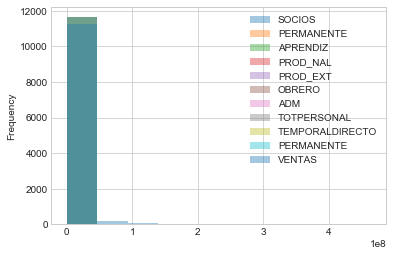

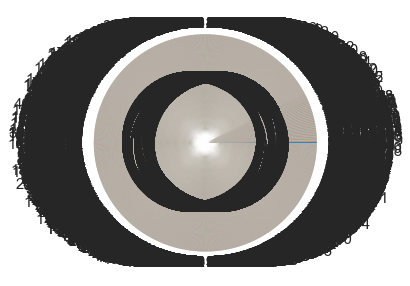

In [38]:
plt.figure("Histograma")
recursosh.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursosh.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

Construcción de las matrices de varianza y covarianza

In [42]:
# Matriz de covarianza
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

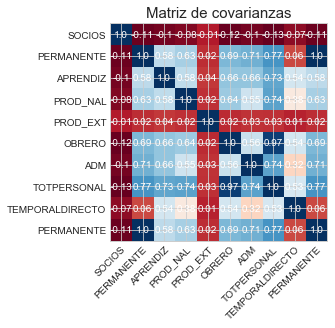

In [46]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots()
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:10])
ax.set_yticklabels(names[:10])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) # o de correlación si los datos están normalizados
plt.show()

Cálculo de los valores propios

In [48]:
eigen_value, eigen_vector =np.linalg.eig(corMat) # KATHE DAVID TIENE (corr) PERO NO ESTÁ DEFINIDO ENTONCES NO ESTOY SEGURA SI SE REFIERE A (corMat) O A QUE TERMINO..
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

Valores propios 
  [ 5.40461602e+00  1.24477738e+00  9.80835884e-01  1.00021539e+00
  1.63899380e-01  2.93471055e-01  4.09587143e-01  5.03456565e-01
 -1.01843054e-15  9.35984428e-16] 

Vectores propios 
 [[-6.66484638e-02 -5.90338350e-03  9.87057861e-01  1.40934012e-01
   5.10076698e-03 -3.72823744e-03  3.65330693e-02 -1.71239953e-03
   4.50070498e-16 -3.50003740e-17]
 [ 3.72131678e-01 -4.15722304e-01  1.41513707e-02  1.52418856e-02
   4.05340020e-01  8.32124229e-02  1.24331529e-01  3.97144289e-02
  -5.70423000e-02  7.02943616e-01]
 [ 3.48487777e-01  2.15062265e-01  3.27268799e-02 -1.69659959e-02
  -1.89941663e-01  7.58682559e-01 -6.60471534e-02 -4.63579886e-01
  -6.03431582e-15 -9.25247760e-17]
 [ 3.39804695e-01  3.91772230e-02  5.35479855e-02  1.18226360e-02
  -5.32330455e-02 -1.07142341e-02 -8.40993533e-01  4.01059032e-01
   9.41576308e-02 -1.02356965e-02]
 [ 1.55409656e-02 -5.60136525e-04  1.41659257e-01 -9.89091030e-01
   1.27408181e-02 -1.30954172e-02  1.47478315e-02  2.88688606e

In [77]:
var=[(eigen_value[i]/10)*100 for i in range(len(eigen_value))]
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum

[54.046160154773794,
 66.49393391545567,
 76.30229275846192,
 86.30444667476371,
 87.94344047810546,
 90.87815103245246,
 94.9740224652937,
 100.00858811405092,
 100.00858811405091,
 100.00858811405092]

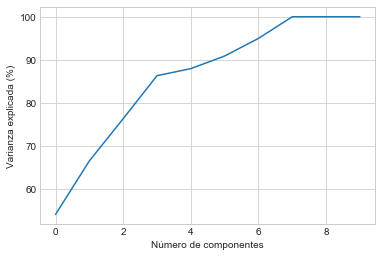

In [78]:
plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

La varianza explicada por cuatro componentes es del 86%, por lo que se toman esos cuatro --> KATHE REVISA ESTA CONCLUSIÓN

Proyección de los datos

In [154]:
M_w=eigen_vector[:,0:10]
Y=X_std.dot(M_w) # Nuevos Y
for name in ('11002090', '1657388', '8600884'):
    plt.scatter(x=Y[y==name,0],y=Y[y==name,1],VENTAS=name)
plt.legend()
plt.show()

C:\Users\CASA\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

# PCA 

In [93]:
from sklearn.decomposition import PCA

In [94]:
sklearn_PCA= PCA(n_components=4)
Y_1=sklearn_PCA.fit_transform(X_std)

for name in ('11002090', '1657388', '8600884'):
    plt.scatter(x=Y_1[y==name,0],y=Y_1[y==name,1],VENTAS=name)
plt.legend()
plt.show()

C:\Users\CASA\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison